# Predicting heart disease using machine learning

This notebook uses Python and machine learning models to predict whether or not someone has heart disease.

## Approach:
1. Problem definition
2. Data analysis
3. Evaluation
4. Features
5. Modelling
6. Experimentation

### 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, it is possible to predict whether the patient has heart disease?

### 2. Data

The original dataset is from the Cleaveland data from the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/heart+Disease

Kaggle version: https://www.kaggle.com/ronitf/heart-disease-uci

### 3. Evaluation

If 95% accuracy of the model is possible, the project shall be pursued.

### 4. Features:

* age - age in years
* sex - (1 = male; 0 = female)
* cp - chest pain type
* trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
* chol - serum cholestoral in mg/dl
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg - resting electrocardiographic results
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
* slope - the slope of the peak exercise ST segment
* ca - number of major vessels (0-3) colored by flourosopy
* thal - thalium stress result
* target - have disease or not (1=yes, 0=no) (= the predicted attribute)

# Preparing the tools

In [1]:
# Import all necessary tools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plots appear inside the notebook
%matplotlib inline 


# Import model from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

## Load data

In [2]:
df=pd.read_csv("heart-disease.csv")
df.shape #rows,columns

(303, 14)

## Data Exploration

In [3]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Heart Disease Frequency according to Sex

In [5]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

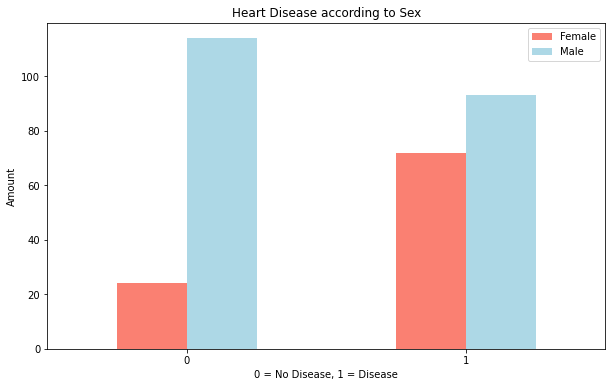

In [6]:
# Compare target with sex
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon","lightblue"])

plt.title("Heart Disease according to Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);

# Age vs. Max Heart Rate for Heart Disease

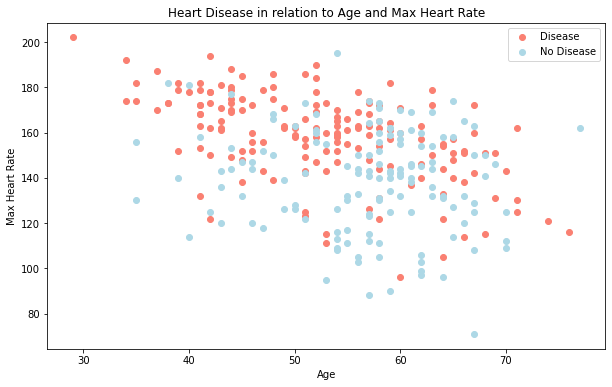

In [7]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon")
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue")

# Add some info about the chart
plt.title("Heart Disease in relation to Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"]);

# Heart Disease Frequency per Chest Pain Type
1. cp - chest pain type
* 0: Typical angina
* 1: Atypical angina
* 2: Non-anginal pain
* 3: Asymptomatic

In [8]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


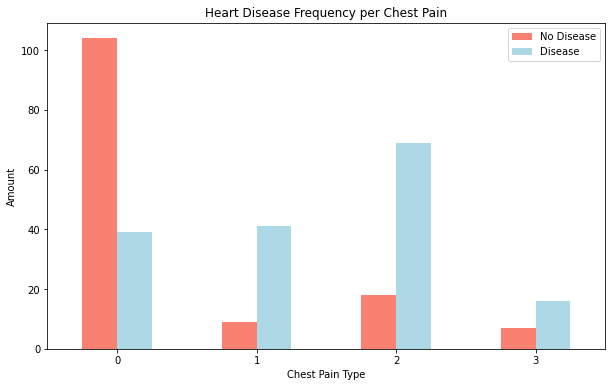

In [9]:
# Plot crosstab
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                 figsize=(10,6),
                                 color=["salmon","lightblue"])

# Add communication
plt.title("Heart Disease Frequency per Chest Pain")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0);

In [10]:
# Correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.5, -0.5)

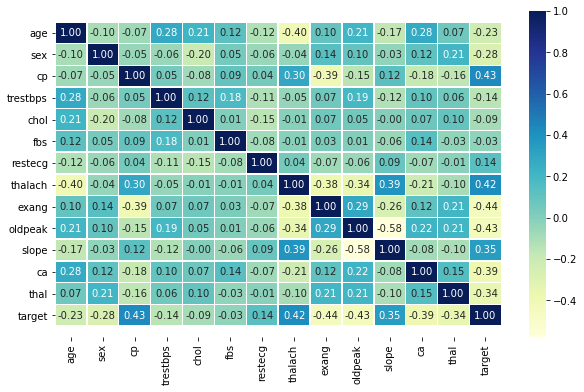

In [11]:
# Vizualise correlation matrix
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(10,6))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidths=0.5,
              fmt=".2f",
              cmap="YlGnBu");
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

## Modelling

In [12]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
# Splitting data into X and y (hiding target for training and testing)
X=df.drop("target",axis=1)
y=df["target"]
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [14]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [15]:
#Setting random seed
np.random.seed(0)

# Splitting data into training and testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
74,43,0,2,122,213,0,1,165,0,0.2,1,0,2
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2


In [16]:
len(y_train)

242

Now it is time to try some models.

## Models to be attempted
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [17]:
# Put the models in a dictionary
models={
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}
# Create a function which fits and scores models
def fit_and_score(models,X_train,X_test,y_train,y_test):
    
    #Set another random seed
    np.random.seed(1)
    model_scores={}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_scores[name]=model.score(X_test,y_test)
    return model_scores

In [18]:
model_scores=fit_and_score(models=models,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
model_scores

C:\Users\Arturas\Desktop\sample_project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8524590163934426,
 'KNN': 0.639344262295082,
 'Random Forest': 0.8360655737704918}

Now that we have our models, lets compare the scores

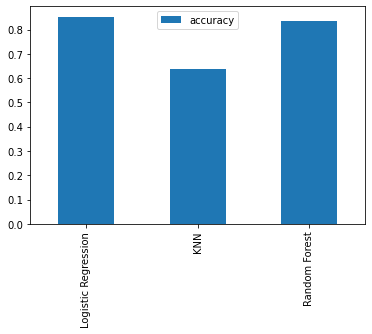

In [25]:
model_dataframe=pd.DataFrame(model_scores,index=["accuracy"])
model_dataframe.T.plot.bar();

# Hyperparameter tuning

In [30]:
# Tuning KNN
train_scores=[]
test_scores=[]

# Create different values for n_neighbors
neighbors=range(1,21)

# Setup KNN instance
knn=KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algo
    knn.fit(X_train,y_train)
    
    # Update training scores list
    train_scores.append(knn.score(X_train,y_train))
    
    # Update testing scores list
    test_scores.append(knn.score(X_test,y_test))
    
train_scores

[1.0,
 0.7975206611570248,
 0.78099173553719,
 0.7603305785123967,
 0.78099173553719,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.731404958677686,
 0.7272727272727273,
 0.6900826446280992,
 0.71900826446281,
 0.6859504132231405,
 0.6983471074380165,
 0.6776859504132231,
 0.6942148760330579,
 0.6983471074380165,
 0.6859504132231405,
 0.6818181818181818,
 0.6818181818181818]

In [31]:
test_scores

[0.5245901639344263,
 0.5901639344262295,
 0.639344262295082,
 0.639344262295082,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.6721311475409836,
 0.6557377049180327,
 0.7049180327868853,
 0.6721311475409836,
 0.7213114754098361,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.7213114754098361,
 0.6885245901639344,
 0.7049180327868853,
 0.6885245901639344]

Maximum KNN score on the test data: 72.13%


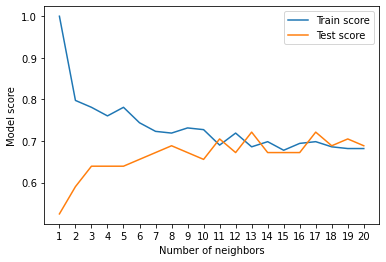

In [35]:
plt.plot(neighbors,train_scores,label="Train score")
plt.plot(neighbors,test_scores,label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors");
plt.ylabel("Model score")
plt.legend()
print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

# Hyperparameter tuning with RandomizedSearchCV

Tuning:
* LogisticRegression()
* RandomForestClassifier()

In [37]:
# Create hyperparameter grid for LogisticRegression
log_reg_grid={
    "C": np.logspace(-4,4,20),
    "solver":["liblinear"]
}

# Create hyperparameter grid for RandomForestClassifier
rf_grid={
    "n_estimators": np.arange(10,1000,50),
    "max_depth": [None,3,5,10],
    "min_samples_split": np.arange(2,20,2),
    "min_samples_leaf": np.arange(1,20,2)
}

In [38]:
# Tune LogisticRegression

np.random.seed(2)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                             param_distributions=log_reg_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [39]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [40]:
rs_log_reg.score(X_test,y_test)

0.8524590163934426

In [41]:
# Tuning RandomForestClassifier()....

# Setup random seed
np.random.seed(3)

# Setup random hyperparameter search for RandomForestClassifier()
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                             param_distributions=rf_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)

# Fit random hyperparameter search mode
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [42]:
rs_rf.best_params_

{'n_estimators': 10,
 'min_samples_split': 4,
 'min_samples_leaf': 5,
 'max_depth': 10}

In [43]:
rs_rf.score(X_test,y_test)

0.8524590163934426

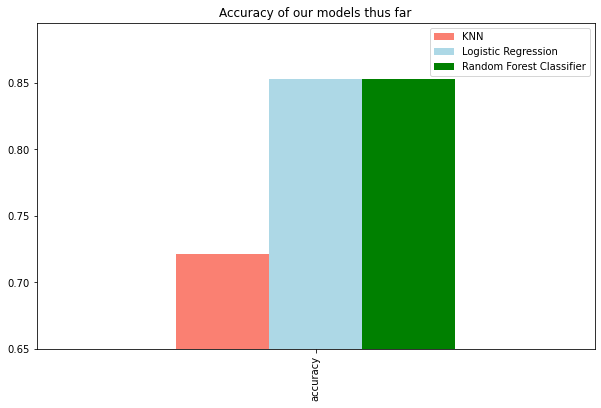

In [71]:
# Let's compare scores
model_scores={
    "KNN":max(test_scores),
    "Logistic Regression": rs_log_reg.score(X_test,y_test),
    "Random Forest Classifier": rs_rf.score(X_test,y_test)
}

model_score_dataframe=pd.DataFrame(model_scores,index=["accuracy"])
model_score_dataframe.plot(kind="bar",
                           figsize=(10,6),
                           color=["salmon","lightblue","green"],
                           title="Accuracy of our models thus far",
                           ylim=0.65);

# Hyperparameter tuning with GridSearchCV

In [76]:
# Different hyperparameters for LogisticRegression
log_reg_grid={
    "C": np.logspace(-4,4,30),
    "solver":["liblinear"]
}
gs_log_reg=GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,cv=5,verbose=True)

gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [77]:
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [78]:
gs_log_reg.score(X_test,y_test)

0.8524590163934426

# Evaluating tuned machine learning classifier

In [84]:
#Make predictions with tuned model
y_preds=gs_log_reg.predict(X_test)

In [85]:
y_preds

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [86]:
y_test

225    0
152    1
228    0
201    0
52     1
      ..
146    1
302    0
26     1
108    1
89     1
Name: target, Length: 61, dtype: int64

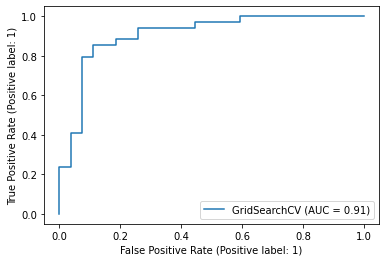

In [87]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg,X_test,y_test)

In [88]:
# Confusion metric
print(confusion_matrix(y_test,y_preds))

[[22  5]
 [ 4 30]]


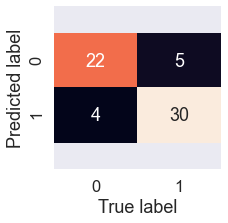

In [89]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom,top=ax.get_ylim()
    ax.set_ylim(bottom+0.5,top-0.5)

plot_conf_mat(y_test,y_preds)

In [90]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



### Calculate evaluation metrics

In [91]:
# Check best hyperparams
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [93]:
clf=LogisticRegression(C=1.3738237958832638,solver='liblinear')
cv_acc=cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc

array([0.81967213, 0.86885246, 0.85245902, 0.85      , 0.71666667])

In [94]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8215300546448088

In [95]:
cv_precision=cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.817900063251107

In [96]:
cv_recall=cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.8727272727272727

In [97]:
cv_f1=cross_val_score(clf,X,y,cv=5,scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.8431741323998502

<AxesSubplot:title={'center':'Cross-validated classification metrics'}>

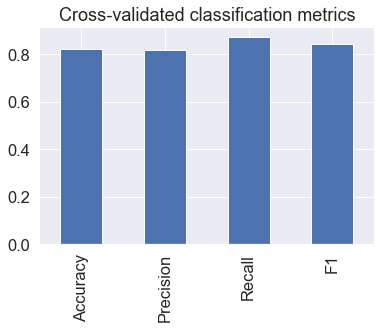

In [98]:
cv_metrics=pd.DataFrame({
    "Accuracy":cv_acc,
    "Precision":cv_precision,
    "Recall":cv_recall,
    "F1":cv_f1
},index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",legend=False)

# Feature importance

In [99]:
# Fit instance of LogisticRegression
clf=LogisticRegression(C=1.3738237958832638,solver="liblinear")
clf.fit(X_train,y_train);

In [100]:
clf.coef_

array([[ 0.00671248, -1.58502785,  0.75396434, -0.00843203, -0.00396127,
        -0.3353385 ,  0.2293114 ,  0.02938386, -0.86471122, -0.53969171,
         0.21084964, -0.86551137, -0.68739776]])

In [101]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [102]:
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.006712475039759865,
 'sex': -1.5850278470915744,
 'cp': 0.7539643441966645,
 'trestbps': -0.00843203422409945,
 'chol': -0.003961268150037997,
 'fbs': -0.3353384986827546,
 'restecg': 0.2293113984549855,
 'thalach': 0.029383855204145642,
 'exang': -0.8647112224306185,
 'oldpeak': -0.5396917078187907,
 'slope': 0.21084964098970807,
 'ca': -0.8655113725626706,
 'thal': -0.6873977619016627}

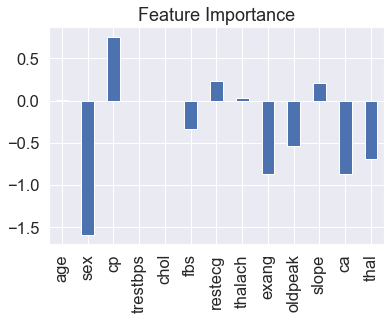

In [103]:
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False);

In [104]:
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [105]:
pd.crosstab(df["slope"],df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


# Done